# Data Visualizations in Python (code-along)
Demonstrate how to answer data science questions using simple visualizations (line, bar, scatter, etc.)

In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mount GDrive's folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This code imports a library "os" that allows file navigation
import os
# This code sets the home directory
# Find your folder and put the path here as a string
os.chdir('/content/drive/MyDrive/my_workspace')

Read csv

In [22]:
df = pd.read_csv("Data/cc_clean.csv")
df.head()

,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
0,6.760000e+11,M,Dasmarinas,659019,Chartered loss adjuster,12/12/1958,798000000000,798000000000,a72eaa86b043eed95b25bbb25b3153a1,1581314011,shopping_net,68.88,2020-02-10 13:53:31
1,3.520000e+15,M,Digos,169393,"Administrator, charities/voluntary organisations",31/08/1970,968000000000,968000000000,060d12f91c13871a13963041736a4702,1590902968,entertainment,50.06,2020-05-31 13:29:28
2,4.140000e+18,M,Calapan,133893,Financial controller,23/07/1953,628000000000,628000000000,18aafb6098ab0923886c0ac83592ef8d,1585461157,food_dining,105.44,2020-03-29 13:52:37
3,4.870000e+15,M,San Fernando,121812,NaN,18/07/1964,863000000000,863000000000,45bbe714e51ab8a375454d39a190b0cb,1613063704,food_dining,38.61,2021-02-12 01:15:04
4,4.720000e+15,M,Laoag,111125,Dance movement psychotherapist,11/01/1954,257000000000,257000000000,c20ee88b451f637bc6893b7460e9fee0,1601282159,gas_transport,82.69,2020-09-28 16:35:59


In [28]:
rfm_df = pd.read_csv("Data/cc_rfm.csv")
rfm_df.head()

,acct_num,recency,recency_score,frequency,frequency_score,total_amt,monetary_score,rfm_score,rfm_level
0,3843260959,25,1,1022,3,69812.15,3,7,Top
1,20386303916,111,3,12,1,8803.87,1,5,Middle
2,24058295524,240,3,11,1,6236.55,1,5,Middle
3,34614744133,25,1,344,2,21803.56,1,4,Middle
4,38399733986,25,1,334,2,24769.02,2,5,Middle


> Q: How did the top spender allocate their budget across different categories for 2021-2022?

In [30]:
top_spender = rfm_df[rfm_df['total_amt'] == rfm_df['total_amt'].max()]['acct_num'].values[0]
top_spender

902000000000

In [40]:
total_amt_df = df.groupby(['cc_num','acct_num'])['amt'].sum().reset_index()
total_amt_top_spender_df = total_amt_df[total_amt_df['amt']==total_amt_df['amt'].max()]
top_spender_cc_num = total_amt_top_spender_df['cc_num'].values[0]
top_spender_acct_num = total_amt_top_spender_df['acct_num'].values[0]
top_spender_cc_num, top_spender_acct_num

(6010000000000000.0, 488000000000)

In [44]:
top_spender_df = df[(df['cc_num'] == top_spender_cc_num) & (df['acct_num']==top_spender_acct_num)]
top_spender_df


,cc_num,gender,city,city_pop,job,dob,acct_num,acct_num2,trans_num,unix_time,category,amt,trans_datetime
146,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,95e598852177041aef6e97382bcd5994,1619071515,shopping_pos,4.25,2021-04-22 14:05:15
175,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,e7442b56d1fbd22f7a847a1986a8745e,1616882653,travel,8.66,2021-03-28 06:04:13
184,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,5d70825d62de2c52828c4fc287f5850d,1608443011,food_dining,77.78,2020-12-20 13:43:31
249,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,7fda9e117f1b8321949eca8f99506c33,1636878972,gas_transport,43.24,2021-11-14 16:36:12
293,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,c8de9a77db49dcc64343e8f4ae34c854,1638637950,kids_pets,25.68,2021-12-05 01:12:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99814,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,74d99fe0efbe35d893a998252d9819e3,1589108651,NaN,193.41,2020-05-10 19:04:11
99821,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,bc903fd8f99b11ae9ebc8b091fe158d9,1629921689,kids_pets,76.58,2021-08-26 04:01:29
99826,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,e2e4933de3c4a31430bc245273b3f366,1605012163,home,44.24,2020-11-10 20:42:43
99956,6.010000e+15,M,Pagadian,199060,"Designer, furniture",24/10/1949,488000000000,488000000000,a8773ab6b08dd22e28fe312d0eb2eac6,1587854667,health_fitness,93.20,2020-04-26 06:44:27


In [46]:
top_spender_category_df = top_spender_df.groupby('category')['amt'].sum().to_frame(name='total_amt').sort_values(by='total_amt', ascending = False)
top_spender_category_df

,total_amt
category,
travel,21083.38
grocery_pos,18662.94
kids_pets,15353.32
shopping_pos,15092.85
gas_transport,14671.60
food_dining,13317.05
misc_pos,10930.60
home,10441.52
shopping_net,9704.47


<Axes: ylabel='total_amt'>

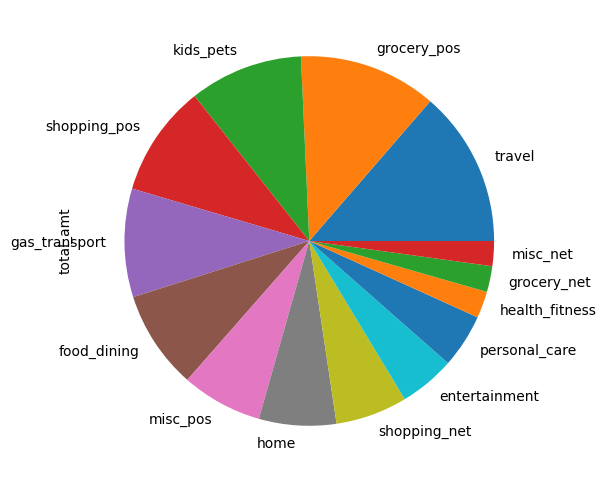

In [48]:
fig_ax = plt.subplots(figsize=(8,6))
colors = ['C0','C1','C2','C3' ]
top_spender_category_df['total_amt'].plot(kind='pie')

In [ ]:
top_spender_cc_num = total_amt_top_spender_df['cc_num'].values[0]
top_spender_acct_num = total_amt_top_spender_df['acct_num'].values[0]
top_spender_cc_num, top_spender_acct_num